# [LCF code](https://en.wikipedia.org/wiki/LCF_notation) extended to 0 and 1. The hamiltonian is used only as scaffolding during construction

*   0s Do not connect the vertex to anything
*   1s connects an edge to the following node as one would expect
*   N and -N create a self-loop


Repetition of 1s recreate the Hamiltonian

By Christopher Stone


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import random


In [ ]:
def LCFS(N_vertices, sequence, repetitions):
  G = nx.Graph()
  vertices = range(N_vertices)
  currentVertex = 0

  for v in vertices:
    G.add_node(v)
  for r in range(repetitions):
    for i in range(len(sequence)):
      if(sequence[i] != 0):
        target = (currentVertex + sequence[i])%N_vertices
        G.add_edge(currentVertex, vertices[target])
      currentVertex = (1 + currentVertex)% N_vertices

  return G

In [ ]:
g = LCFS(8,[1,0,1,2,3,4],8)

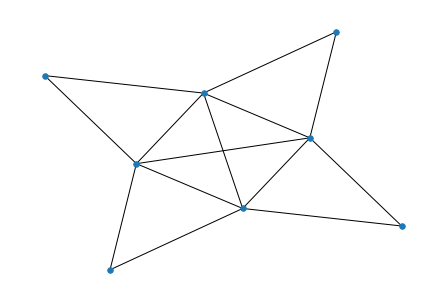

In [ ]:
nx.draw(g, nx.fruchterman_reingold_layout(g,iterations = 230),node_size=30)

# Graph generators with randomised sequences

In [ ]:
def randomGen(N_vertices, max_sequence, repetitions):
  sequence = []

  for i in range(max_sequence):
    sequence.append(random.randint(-N_vertices/2,N_vertices/2))

  return LCFS(N_vertices,sequence,repetitions),sequence


In [ ]:
def randomSequence(N_vertices, max_sequence, repetitions):
  sequence = []

  for i in range(max_sequence):
    sequence.append(random.randint(-N_vertices-1,N_vertices-1))

  return LCFS(N_vertices,sequence,repetitions),sequence

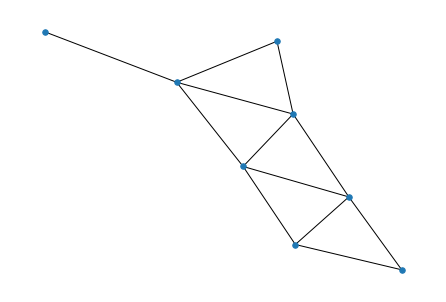

In [ ]:
g,s = randomGen(8,4,3)
nx.draw(g, nx.fruchterman_reingold_layout(g,iterations = 230),node_size=30)



Simple template to generate multiple parameterised random graphs

In [ ]:
gs = []
vertices = 60
sequenceLength = 4
repetitions = 90
for i in range(20):
  gs.append(randomSequence(vertices,sequenceLength,repetitions))

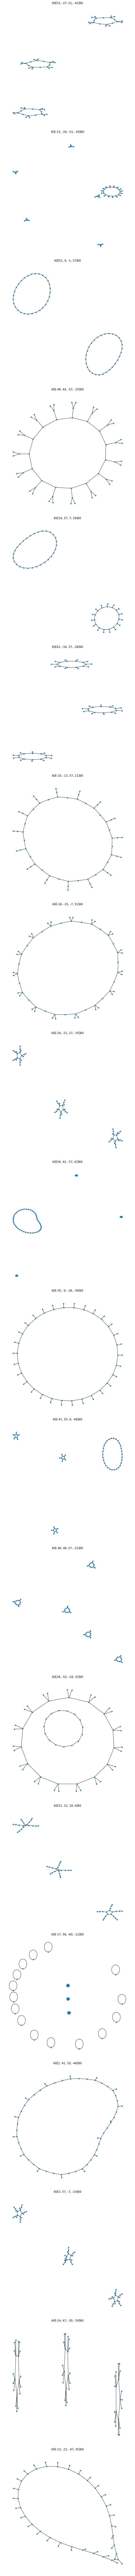

In [ ]:
fig, axs = plt.subplots(len(gs), figsize=(10, 10*len(gs)))

for i, ax_row in enumerate(axs):
  my_graph, sequenceCode = gs[i]
  if hasattr(my_graph, 'is_directed'):
    nx.draw(my_graph, nx.fruchterman_reingold_layout(my_graph,iterations = 450), node_size=20, ax=ax_row)
  ax_row.set_xticks([])
  ax_row.set_yticks([])
  ax_row.title.set_text(str(vertices) + str(sequenceCode) + str(vertices))

plt.subplots_adjust(wspace=0.05, hspace=0.05)